In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from qecsim.graphtools import blossom5
import time

In [ ]:

def x_recovery_xy_plane(x1,y1,x2,y2):
    # assuming y2>y1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl = min(dx,r1-dx)+min(dy,r2-dy)
    if dy > r2-dy:
        if dx > r1-dx:
            if x1<x2:
                v1x = np.arange(x1,x2-r1-1,-1) %r1 
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1-1,x2-r1-1,-1)%r1 + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1)%r2 + 0.5
            else:
                v1x = np.arange(x2,x1-r1-1,-1) %r1 
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2-1,x1-r1-1,-1)%r1 + 0.5
                p1y = [y2]*len(p1x)                
                v2y = np.arange(y2+1,y1+r2+1) %r2
                p2y = np.arange(y2,y1+r2)%r2 + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1,x2) + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1) %r2 + 0.5
            elif x1==x2:
                v2y = np.arange(y1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1) %r2 + 0.5
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2,x1) + 0.5
                p1y = [y2]*len(p1x)
                v2y = np.arange(y2+1,y1+r2+1) %r2
                p2y = np.arange(y2,y1+r2) %r2 + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
            
        if dx == 0:
            vx = np.array(v2x)
            vy = np.array(v2y)
            px = np.array(p2x)
            py = np.array(p2y) 
        else:
            vx = np.concatenate((v1x,v2x))
            vy = np.concatenate((v1y,v2y))
            px = np.concatenate((p1x,p2x))
            py = np.concatenate((p1y,p2y))
            
    else:
        if dx > r1-dx:
            if dy>0:
                if x1<x2:
                    v1x = np.arange(x1,x2-r1-1,-1)%r1
                    v1y = [y1]*len(v1x)
                    p1x = np.arange(x1-1,x2-r1-1,-1)%r1 + 0.5
                    p1y = [y1]*len(p1x)
                    v2y = np.arange(y1+1,y2+1)
                    p2y = np.arange(y1,y2) + 0.5
                else:
                    v1x = np.arange(x2,x1-r1-1,-1)%r1
                    v1y = [y2]*len(v1x)
                    p1x = np.arange(x2-1,x1-r1-1,-1)%r1 + 0.5
                    p1y = [y2]*len(p1x)
                    v2y = np.arange(y2-1,y1-1,-1)
                    p2y = np.arange(y2,y1,-1) - 0.5
                v2x = [max(x1,x2)]*len(v2y)
                p2x = [max(x1,x2)]*len(p2y)
                
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))
                px = np.concatenate((p1x,p2x))
                py = np.concatenate((p1y,p2y))
            else:
                vx = np.arange(min(x1,x2),max(x1,x2)-r1-1,-1)%r1
                vy = np.array([y1]*len(vx))
                px = np.arange(min(x1,x2)-1,max(x1,x2)-r1-1,-1)%r1 + 0.5
                py = np.array([y1]*len(px))
                
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                v2y = np.arange(y1+1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            elif x1==x2:
                v2y = np.arange(y1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                v2y = np.arange(y2-1,y1-1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                
            if dy ==0:
                vx = np.array(v1x)
                vy = np.array(v1y)
            elif dx == 0:
                vx = np.array(v2x)
                vy = np.array(v2y)
            else:
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))

            px = (vx[0:len(vx)-1]+vx[1:])/2 
            py = (vy[0:len(vy)-1]+vy[1:])/2 

    return px, py

def x_recovery(x1,y1,z1,x2,y2,z2):
    # by construction z2>z1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl_xy = min(dx,r1-dx)+min(dy,r2-dy)
    dz = np.abs(z1-z2)
    
    if dl_xy >0:
        if y2<y1:
            p1x,p1y = x_recovery_xy_plane(x2,y2,x1,y1)
            p1z = [z2]*len(p1x)
            if dz > r3-dz:
                p2z = np.arange(z2,z1+r3)%r3 + 0.5
            else:
                p2z = np.arange(z2-1,z1-1,-1) + 0.5
            p2x = [x1]*len(p2z)
            p2y = [y1]*len(p2z)
                
        else:
            p1x,p1y = x_recovery_xy_plane(x1,y1,x2,y2)
            p1z = [z1]*len(p1x)
            if dz > r3-dz:
                p2z = np.arange(z1-1,z2-r3-1,-1) %r3 + 0.5
            else:
                p2z = np.arange(z1,z2) + 0.5
            p2x = [x2]*len(p2z)
            p2y = [y2]*len(p2z)
            
        px = np.concatenate((p1x,p2x))
        py = np.concatenate((p1y,p2y))
        pz = np.concatenate((p1z,p2z))

    else:
        if dz > r3-dz:
            pz = np.arange(z1-1,z2-r3-1,-1) %r3 + 0.5
        else:
            pz = np.arange(z1,z2) + 0.5
        px = np.array([x1]*len(pz))
        py = np.array([y1]*len(pz))
            
    return px,py,pz

l = 3 # number of sublattice points (2 for toric code) or primal/dual
Nrep = 1000 # number of iterations
L_list = [7,9,11,13]
pz_list = np.linspace(0.02,0.04,10)
fail_prob_z = np.zeros((len(L_list),len(pz_list)))

for i_L, r in enumerate(L_list):
    print("L= ", r)
    tic = time.time()
    r1 = r # dimension of cube
    r2 = r # dimension of cube
    r3 = r # dimension of cube

    # star stabilzers
    Sx = np.zeros((r1*r2*r3,l*r1*r2*r3))
    for ix in range(r1):
        for iy in range(r2):
            for iz in range(r3):
                Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))] = 1
                Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))+1] = 1
                Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))+2] = 1
                Sx[ix + r1*(iy+ r2*iz), l*( ((ix-1)%r1) + r1*(iy+ r2*iz))] = 1
                Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*( ((iy-1)%r2)+ r2*iz) )+1] = 1
                Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2* ((iz-1)%r3)) )+2] = 1

    logicals = np.zeros((3,l*r1*r2*r3))
    ## x ops
    for i1 in range(r2):
        logicals[0,np.ix_(3*np.arange(i1*r1,r1*r2*r3,r1*r2))] = np.ones(r3)
    for i1 in range(r3):
        logicals[1,np.ix_(1+ 3*(i1*r1*r2+ np.arange(0,r1) ) )] = np.ones(r1)
    logicals[2,2:3*r1*r2+1:3] = np.ones(r1*r2) 

    # print(np.dot(logicals,logicals.T))
    for i_p, prob_z in enumerate(pz_list):
        # z flip error
        for i_n in range(Nrep):
            zflip = np.random.rand(l,r1,r2,r3) 
            zflip_inds = np.argwhere(zflip < prob_z)
            error_z = np.zeros(l*r1*r2*r3)
            for i in range(len(zflip_inds)):
                error_z[zflip_inds[i][0]+l*(zflip_inds[i][1]+r1*(zflip_inds[i][2]+r2*zflip_inds[i][3]))] = 1

            # find syndrome
            syndrome_x = np.dot(error_z,Sx.T) % 2
            synd_x_inds = np.argwhere(syndrome_x > 0)[:,0]
            # print(synd_x_inds)
           
            x_graph = []
            x_graph_inds = []
            x_graph_paths = {}
            c0 =0
            c1 =0
            for i1 in range(len(synd_x_inds)):
                for i2 in range(i1+1,len(synd_x_inds)):
                    c0 +=1 
                    ind1 = synd_x_inds[i1]
                    ind2 = synd_x_inds[i2]        
                    x_graph_inds.append([ind1,ind2])
                    z1 = int(ind1/(r1*r2))
                    z2 = int(ind2/(r1*r2))
                    dz = np.abs(z1-z2)
                    y1 = int(ind1/r1)% r2
                    y2 = int(ind2/r1)% r2
                    dy = np.abs(y1-y2)
                    x1 = ind1%r1
                    x2 = ind2%r1
                    dx = np.abs(x1-x2)               

                    dz = min(dz,r3-dz)
                    dy = min(dy,r2-dy)
                    dx = min(dx,r1-dx)
                    x_graph.append((i1,i2,(dx+dy+dz) ))
            #         px, py, pz = x_recovery(x1,y1,z1,x2,y2,z2)
            #         rec_x = np.zeros(l*r1*r2*r3)
            #         for j in range(len(px)):
            #             if px[j]-int(px[j])>0:
            #                 rec_x[3*( (int(py[j])+int(pz[j])*r2)*r1+int(px[j]))] = 1
            #             elif py[j]-int(py[j])>0:
            #                 rec_x[1+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] = 1
            #             else:
            #                 rec_x[2+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] = 1

            #         # print(np.abs(z1-z2)> (r3-np.abs(z1-z2)))
            #         syndrome_x_2 = np.dot(rec_x,Sx.T) % 2
            #         synd_x_2_inds = np.argwhere(syndrome_x_2 > 0)[:,0]
            #         if ind1!= synd_x_2_inds[0] or ind2!= synd_x_2_inds[1]:
            #             print(np.abs(x1-x2)> (r1-np.abs(x1-x2)),np.abs(y1-y2)> (r2-np.abs(y1-y2)),np.abs(z1-z2)> (r3-np.abs(z1-z2)))
            #             print([ind1,ind2],synd_x_2_inds)
            #             print("----")
            #             c1 += 1

            # print(c1/c0)
            # # # print(z_graph_inds)    
            # print(x_graph)
            rec_x = np.zeros(l*r1*r2*r3)
            mates = blossom5.mwpm_ids(x_graph)
            # print(mates)
            # plt.figure(1)
            for links in mates:
                l_graph = synd_x_inds[np.array(links)]
            #     print(synd_z_inds[mates[i],1])

                x1 = (l_graph[0]%r1) 
                y1 = int(l_graph[0]/r1)%r2
                z1 = int(l_graph[0]/(r1*r2))
                x2 = (l_graph[1]%r1) 
                y2 = int(l_graph[1]/r1)%r2
                z2 = int(l_graph[1]/(r1*r2))
                # print([x1,y1],[x2,y2])
                px, py, pz = x_recovery(x1,y1,z1,x2,y2,z2)
            # #     plt.plot(px,py,"ro")

                for j in range(len(px)):
                    if px[j]-int(px[j])>0:
                        rec_x[3*( (int(py[j])+int(pz[j])*r2)*r1+int(px[j]))] += 1
                    elif py[j]-int(py[j])>0:
                        rec_x[1+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] += 1
                    else:
                        rec_x[2+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] += 1

            np.dot( (rec_x + error_z )%2 , logicals.T) % 2

            assert np.sum(np.dot( (rec_x + error_z )%2 , Sx.T) % 2) == 0

            ###########
            if np.sum(np.dot( (rec_x + error_z )%2, logicals.T) %2)  > 0:
                fail_prob_z[i_L,i_p] +=  1
    toc = time.time()
    print("Finished in %d secs" % (toc-tic))

print("Done!")

L=  7


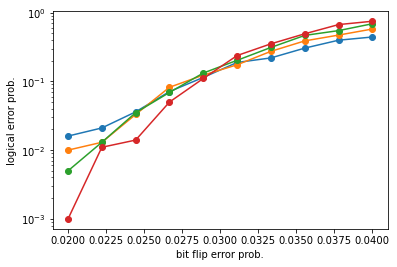

In [92]:
plt.plot(pz_list,fail_prob_z.T/Nrep,"o-")
# plt.plot(px_list,fail_prob_x.T/Nrep,"x-")
plt.xlabel("bit flip error prob.")
plt.ylabel("logical error prob.")
plt.yscale("log")
plt.show()

In [93]:
 print("Finished in %d secs" % (toc-tic))

Finished in 8224 secs


In [7]:
def x_recovery_xy_plane(x1,y1,x2,y2):
    # assuming y2>y1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl = min(dx,r1-dx)+min(dy,r2-dy)
    if dy > r2-dy:
        if dx > r1-dx:
            if x1<x2:
                v1x = np.arange(x1,x2-r1-1,-1) %r1 
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1-1,x2-r1-1,-1)%r1 + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1)%r2 + 0.5
            else:
                v1x = np.arange(x2,x1-r1-1,-1) %r1 
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2-1,x1-r1-1,-1)%r1 + 0.5
                p1y = [y2]*len(p1x)                
                v2y = np.arange(y2+1,y1+r2+1) %r2
                p2y = np.arange(y2,y1+r2)%r2 + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1,x2) + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1) %r2 + 0.5
            elif x1==x2:
                v2y = np.arange(y1,y2-r2-1,-1) %r2
                p2y = np.arange(y1-1,y2-r2-1,-1) %r2 + 0.5
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2,x1) + 0.5
                p1y = [y2]*len(p1x)
                v2y = np.arange(y2+1,y1+r2+1) %r2
                p2y = np.arange(y2,y1+r2) %r2 + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
            
        if dx == 0:
            vx = np.array(v2x)
            vy = np.array(v2y)
            px = np.array(p2x)
            py = np.array(p2y) 
        else:
            vx = np.concatenate((v1x,v2x))
            vy = np.concatenate((v1y,v2y))
            px = np.concatenate((p1x,p2x))
            py = np.concatenate((p1y,p2y))
            
    else:
        if dx > r1-dx:
            if dy>0:
                if x1<x2:
                    v1x = np.arange(x1,x2-r1-1,-1)%r1
                    v1y = [y1]*len(v1x)
                    p1x = np.arange(x1-1,x2-r1-1,-1)%r1 + 0.5
                    p1y = [y1]*len(p1x)
                    v2y = np.arange(y1+1,y2+1)
                    p2y = np.arange(y1,y2) + 0.5
                else:
                    v1x = np.arange(x2,x1-r1-1,-1)%r1
                    v1y = [y2]*len(v1x)
                    p1x = np.arange(x2-1,x1-r1-1,-1)%r1 + 0.5
                    p1y = [y2]*len(p1x)
                    v2y = np.arange(y2-1,y1-1,-1)
                    p2y = np.arange(y2,y1,-1) - 0.5
                v2x = [max(x1,x2)]*len(v2y)
                p2x = [max(x1,x2)]*len(p2y)
                
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))
                px = np.concatenate((p1x,p2x))
                py = np.concatenate((p1y,p2y))
            else:
                vx = np.arange(min(x1,x2),max(x1,x2)-r1-1,-1)%r1
                vy = np.array([y1]*len(vx))
                px = np.arange(min(x1,x2)-1,max(x1,x2)-r1-1,-1)%r1 + 0.5
                py = np.array([y1]*len(px))
                
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                v2y = np.arange(y1+1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            elif x1==x2:
                v2y = np.arange(y1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                v2y = np.arange(y2-1,y1-1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                
            if dy ==0:
                vx = np.array(v1x)
                vy = np.array(v1y)
            elif dx == 0:
                vx = np.array(v2x)
                vy = np.array(v2y)
            else:
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))

            px = (vx[0:len(vx)-1]+vx[1:])/2 
            py = (vy[0:len(vy)-1]+vy[1:])/2 

    return px, py

def x_recovery(x1,y1,z1,x2,y2,z2):
    # by construction z2>z1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl_xy = min(dx,r1-dx)+min(dy,r2-dy)
    dz = np.abs(z1-z2)
    
    if dl_xy >0:
        if y2<y1:
            p1x,p1y = x_recovery_xy_plane(x2,y2,x1,y1)
            p1z = [z2]*len(p1x)
            if dz > r3-dz:
                p2z = np.arange(z2,z1+r3)%r3 + 0.5
            else:
                p2z = np.arange(z2-1,z1-1,-1) + 0.5
            p2x = [x1]*len(p2z)
            p2y = [y1]*len(p2z)
                
        else:
            p1x,p1y = x_recovery_xy_plane(x1,y1,x2,y2)
            p1z = [z1]*len(p1x)
            if dz > r3-dz:
                p2z = np.arange(z1-1,z2-r3-1,-1) %r3 + 0.5
            else:
                p2z = np.arange(z1,z2) + 0.5
            p2x = [x2]*len(p2z)
            p2y = [y2]*len(p2z)
            
        px = np.concatenate((p1x,p2x))
        py = np.concatenate((p1y,p2y))
        pz = np.concatenate((p1z,p2z))

    else:
        if dz > r3-dz:
            pz = np.arange(z1-1,z2-r3-1,-1) %r3 + 0.5
        else:
            pz = np.arange(z1,z2) + 0.5
        px = np.array([x1]*len(pz))
        py = np.array([y1]*len(pz))
            
    return px,py,pz

l = 3 # number of sublattice points (2 for toric code) or primal/dual
ti = time.time()
r = 18
r1 = r # dimension of cube
r2 = r # dimension of cube
r3 = r # dimension of cube

# star stabilzers
Sx = np.zeros((r1*r2*r3,l*r1*r2*r3))
for ix in range(r1):
    for iy in range(r2):
        for iz in range(r3):
            Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))] = 1
            Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))+1] = 1
            Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2*iz))+2] = 1
            Sx[ix + r1*(iy+ r2*iz), l*( ((ix-1)%r1) + r1*(iy+ r2*iz))] = 1
            Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*( ((iy-1)%r2)+ r2*iz) )+1] = 1
            Sx[ix + r1*(iy+ r2*iz), l*(ix + r1*(iy+ r2* ((iz-1)%r3)) )+2] = 1

logicals = np.zeros((3,l*r1*r2*r3))
## x ops
for i1 in range(r2):
    logicals[0,np.ix_(3*np.arange(i1*r1,r1*r2*r3,r1*r2))] = np.ones(r3)
for i1 in range(r3):
    logicals[1,np.ix_(1+ 3*(i1*r1*r2+ np.arange(0,r1) ) )] = np.ones(r1)
logicals[2,2:3*r1*r2+1:3] = np.ones(r1*r2) 

prob_z = 0.02
# z flip error
zflip = np.random.rand(l,r1,r2,r3) 
zflip_inds = np.argwhere(zflip < prob_z)
error_z = np.zeros(l*r1*r2*r3)
for i in range(len(zflip_inds)):
    error_z[zflip_inds[i][0]+l*(zflip_inds[i][1]+r1*(zflip_inds[i][2]+r2*zflip_inds[i][3]))] = 1

# find syndrome
syndrome_x = np.dot(error_z,Sx.T) % 2
synd_x_inds = np.argwhere(syndrome_x > 0)[:,0]
# print(synd_x_inds)

x_graph = []
x_graph_inds = []
x_graph_paths = {}
c0 =0
c1 =0
for i1 in range(len(synd_x_inds)):
    for i2 in range(i1+1,len(synd_x_inds)):
        c0 +=1 
        ind1 = synd_x_inds[i1]
        ind2 = synd_x_inds[i2]        
        x_graph_inds.append([ind1,ind2])
        z1 = int(ind1/(r1*r2))
        z2 = int(ind2/(r1*r2))
        dz = np.abs(z1-z2)
        y1 = int(ind1/r1)% r2
        y2 = int(ind2/r1)% r2
        dy = np.abs(y1-y2)
        x1 = ind1%r1
        x2 = ind2%r1
        dx = np.abs(x1-x2)               

        dz = min(dz,r3-dz)
        dy = min(dy,r2-dy)
        dx = min(dx,r1-dx)
        x_graph.append((i1,i2,(dx+dy+dz) ))
#         px, py, pz = x_recovery(x1,y1,z1,x2,y2,z2)
#         rec_x = np.zeros(l*r1*r2*r3)
#         for j in range(len(px)):
#             if px[j]-int(px[j])>0:
#                 rec_x[3*( (int(py[j])+int(pz[j])*r2)*r1+int(px[j]))] = 1
#             elif py[j]-int(py[j])>0:
#                 rec_x[1+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] = 1
#             else:
#                 rec_x[2+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] = 1

#         # print(np.abs(z1-z2)> (r3-np.abs(z1-z2)))
#         syndrome_x_2 = np.dot(rec_x,Sx.T) % 2
#         synd_x_2_inds = np.argwhere(syndrome_x_2 > 0)[:,0]
#         if ind1!= synd_x_2_inds[0] or ind2!= synd_x_2_inds[1]:
#             print(np.abs(x1-x2)> (r1-np.abs(x1-x2)),np.abs(y1-y2)> (r2-np.abs(y1-y2)),np.abs(z1-z2)> (r3-np.abs(z1-z2)))
#             print([ind1,ind2],synd_x_2_inds)
#             print("----")
#             c1 += 1

# print(c1/c0)
# # # print(z_graph_inds)    
# print(x_graph)
rec_x = np.zeros(l*r1*r2*r3)
mates = blossom5.mwpm_ids(x_graph)
# print(mates)
# plt.figure(1)
for links in mates:
    l_graph = synd_x_inds[np.array(links)]
#     print(synd_z_inds[mates[i],1])

    x1 = (l_graph[0]%r1) 
    y1 = int(l_graph[0]/r1)%r2
    z1 = int(l_graph[0]/(r1*r2))
    x2 = (l_graph[1]%r1) 
    y2 = int(l_graph[1]/r1)%r2
    z2 = int(l_graph[1]/(r1*r2))
    # print([x1,y1],[x2,y2])
    px, py, pz = x_recovery(x1,y1,z1,x2,y2,z2)
# #     plt.plot(px,py,"ro")

    for j in range(len(px)):
        if px[j]-int(px[j])>0:
            rec_x[3*( (int(py[j])+int(pz[j])*r2)*r1+int(px[j]))] += 1
        elif py[j]-int(py[j])>0:
            rec_x[1+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] += 1
        else:
            rec_x[2+3*((int(py[j])+int(pz[j])*r2)*r1+int(px[j]) )] += 1

np.dot( (rec_x + error_z )%2 , logicals.T) % 2

assert np.sum(np.dot( (rec_x + error_z )%2 , Sx.T) % 2) == 0

###########
print( np.dot( (rec_x + error_z )%2, logicals.T) %2) 
tf = time.time()
print("Finished in %.2f secs" % (tf-ti))



[0. 0. 0.]
Finished in 3.22 secs
